# Konwolucyjne sieci neuronowe

Dziś spróbujemy stworzyć i wytrenować prostą sieć konwolucyjną do rozpoznawania, co znajduje się na obrazie. Następnie omówimy kwestię identyfikowania obiektów na obrazie, oraz porozmawiamy o wykorzystaniu gotowej już sieci.

## Problem klasyfikacji obrazów

Jak się za to zabrać? Naiwnym podejściem byłaby próba ręcznej specyfikacji pewnych cech (niemowlęta mają duże głowy, szczoteczki są długie, etc.). Szybko jednak stwierdziliśmy, że nawet dla niewielkiego zbioru kategorii jest to tytaniczna praca bez gwarancji sukcesu. Co więcej, istnieje wiele czynników zniekształcających zawartość naszych zdjęć. Obiekty mogą być przedstawiane z różnych ujęć, w różnych warunkach oświetleniowych, w różnej skali, częściowo niewidoczne, ukryte w tle...

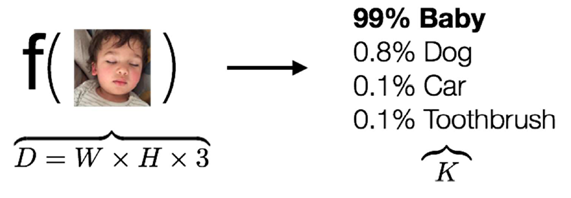


Wszystkie wymienione problemy są skutkiem istnienia semantycznej przepaści między tym, jak reprezentowane są nasze dane wejściowe (tablica liczb), a tym, czego w nich szukamy, czyli kategorii i cech: zwierząt, nosów, głów, itp. Zamiast więc próbować samodzielnie napisać funkcję $f(x)$, spróbujemy skorzystać z dobrodziejstw uczenia maszynowego, aby automatycznie skonstruować reprezentację wejścia właściwą dla postawionego sobie zadania (a przynajmniej lepszą od pierwotnej). I tu z pomocą przychodzą nam konwolucyjne sieci neuronowe. Do tego trzeba zrozumieć, czym jest konwolucja (inaczej: splot), a do tego najlepiej nadają się ilustracje, jak to działa.

### Konwolucja

Konwolucja (splot) to działanie określone dla dwóch funkcji, dające w wyniku inną, która może być postrzegana jako zmodyfikowana wersja oryginalnych funkcji.

Z naszego punktu widzenia polega to na tym, że mnożymy odpowiadające sobie elementy z dwóch macierzy: obrazu, oraz mniejszej, nazywanej filtrem (lub kernelem. Następnie sumujemy wynik i zapisujemy do macierzy wynikowej na odpowiedniej pozycji. Proces powtarza się aż do momentu przeskanowania całego obrazu. Taki filtr wykrywa, czy coś do niego pasuje w danym miejscu, i z tego wynika zdolność semantycznej generalizacji sieci - uczymy się cech, a wykrywamy je potem w dowolnym miejscu. [Przydatne pojęcia](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

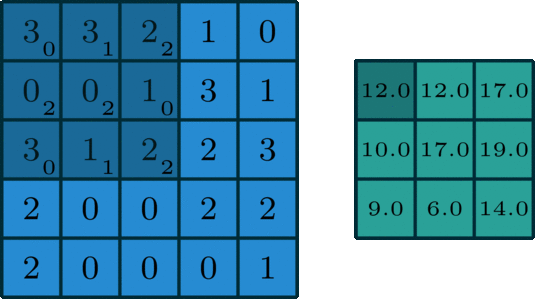

### Stride

Stride to inaczej *krok algorytmu*, albo *przesunięcie*. Określa co ile komórek macierzy następuje aplikacja operatora konwolucji. Jeśli stride wynosi 1 a operator konwolucji ma rozmiar np. 3 x 3, to każdy piksel (z wyjątkiem skrajnych narożnych pikseli) będzie uczestniczył w wielu operacjach konwolucji. Jeśli natomiast krok wyniósłby 3, to każdy piksel uczestniczyłby tylko jednokrotnie w tych operacjach. Należy pamiętać, że krok stosujemy zarówno w poziomie, jak i pionie. Najczęściej w obu kierunkach wykorzystuje się ten sam krok.


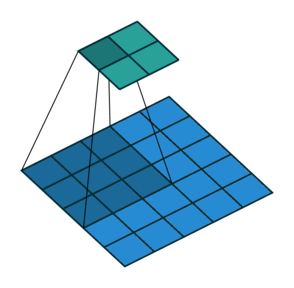



### Padding

Padding to inaczej *wypełnienie* krawędzi obrazu. Określa, w jaki sposób będą traktowane skrajne piksele. Jeśli padding wynosi 0, to skrajne piksele będą uczestniczyły w operacjach konwolucji rzadziej, niż pozostałe piksele (oczywiście jest to również uzależnione od wartości kroku). Aby zniwelować ten efekt, możemy dodać wypełnienie wokół całego obrazu. Te dodatkowe piksele mogą być zerami, albo mogą być również jakimiś uśrednionymi wartościami pikseli sąsiednich. Wypełnienie zerami oznacza de facto obramowanie całego obrazu czarną ramkną.

[Więcej na temat wypełnienia.](https://www.geeksforgeeks.org/cnn-introduction-to-padding/)

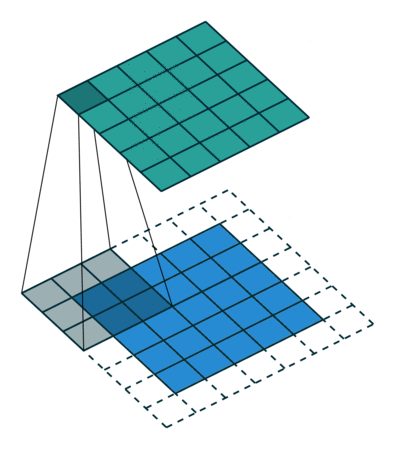

### Pooling

Pooling jest procesem wykorzystywanym do redukcji rozmiaru obrazu.
Występują 2 warianty: *max-pooling* oraz *avg-pooling*. Pozwala on usunąć zbędne dane, np. jeżeli filtr wykrywa linie, to istnieje spora szansa, że linie te ciągną się przez sąsiednie piksele, więc nie ma powodu powielać tej informacji. Dzięki temu wprowadzamy pewną inwariancję w wagach sieci i jesteśmy odporni na niewielkie wahania lokalizacji informacji, a skupiamy się na "większym obrazie".

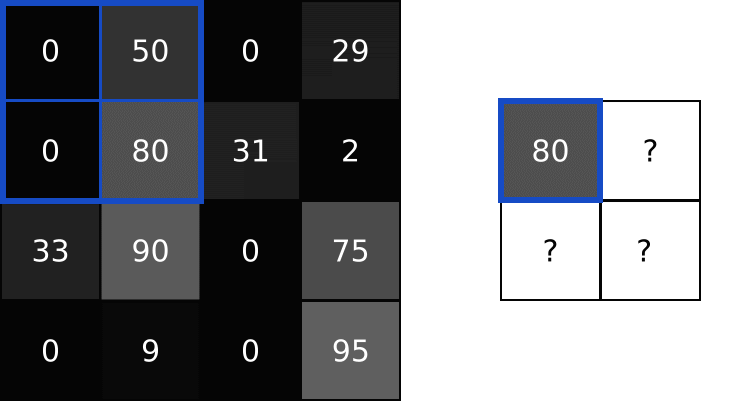

### Sposoby redukcji przeuczenia

* warstwa dropout - wyłączanie losowych neuronów w trakcie uczenia,
* regularyzacja wag - ograniczenie sumy wartości wag,
* metoda wczesnego stopu (early stopping) - zatrzymanie uczenia, jeśli proces uczenia nie poprawia wyników,
* normalizacja paczki (batch normalization) - centrowanie i skalowanie wartości wektorów *w obrębie batcha danych*,
* rozszerzanie danych (data augmentation) - generowanie lekko zaburzonych danych, na podstawie danych treningowych,
* lub... więcej danych.

### Budowa sieci CNN do klasyfikacji obrazów

Sieć konwolucyjna składa się zawsze najpierw, zgodnie z nazwą, z części konwolucyjnej, której zadaniem jest wyodrębnienie przydatnych cech z obrazu za pomocą filtrów, warstw poolingowych etc.

Warstwa konwolucyjna sieci neuronowej składa się z wielu filtrów konwolucyjnych działających równolegle (tj. wykrywających różne cechy). Wagi kerneli, początkowo zainicjalizowane losowo, są dostrajane w procesie uczenia. Wynik działania poszczególnych filtrów jest przepuszczany przez funkcję nieliniową. Mamy tu do czynienia z sytuacją analogiczną jak w MLP: najpierw wykonujemy przekształcenie liniowe, a potem stosujemy funkcję aktywacji. Funkcji aktywacji nie stosuje się jendak po warstawch poolingowych, są to stałe operacje nie podlegające uczeniu.

W celu klasyfikacji obrazu musimy później użyć sieci MLP. Jako że wejściem do sieci MLP jest zawsze wektor, a wyjściem warstwy konwolucyjnej obraz. Musimy zatem obraz przetworzony przez filtry konwolucyjne sprowadzić do formy wektora, tzw. **embedding-u / osadzenia**, czyli reprezentacji obrazu jako punktu w pewnej ciągłej przestrzeni. Służy do tego warstwa spłaszczająca (flatten layer), rozwijająca macierze wielkowymiarowe na wektor, np $10 \times 10 \times 3$ na $300 \times 1$.

Część konwolucyjna nazywa się często **backbone**, a część MLP do klasyfikacji **head**. Głowa ma zwykle 1-2 warstwy w pełni połączone, z aktywacją softmax w ostatniej warstwie. Czasem jest nawet po prostu pojedynczą warstwą z softmaxem, bo w dużych sieciach konwolucyjnych ekstrakcja cech jest tak dobra, że taka prosta konstrukcja wystacza do klasyfikacji embeddingu.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Wybierzmy rodzaj akceleracji. Współczesne wersje PyTorch wspierają akcelerację nie tylko na kartach Nvidii i AMD, ale również na procesorach Apple z serii M. Obsługa AMD jest realizowana identycznie jak CUDA natomiast MPS (Apple) ma nieco inne API do sprawdzania dostępności i wybierania urządzenia.
Zapisujemy wybrane urządzenie do zmiennej `device`, dzięki czemu w dalszych częściach kodu już nie będziemy musieli o tym myśleć.

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

print(device)

cuda:0


W pakiecie torchvision mamy funkcje automatycznie pobierające niektóre najbardziej popularne zbiory danych z obrazami.

W tym ćwiczeniu wykorzystamy zbiór FashionMNIST, który zawiera małe (28x28) zdjęcia ubrań w skali szarości. Zbiór ten został stworzony przez Zalando i jest "modowym" odpowiednikiem "cyferkowego" MNIST-a, jest z nim kompatybilny pod względem rozmiarów i charakterystyki danych, ale jest od MNIST-a trudniejszy w klasyfikacji.

Do funkcji ładujących zbiory danych możemy przekazać przekształcenie, które powinno zostać na nim wykonane. Przekształcenia można łączyć przy użyciu `transforms.Compose`. W tym przypadku przekonwertujemy dane z domyślnej reprezentacji PIL.Image na torch-owe tensory.

Pobrany dataset przekazujemy pod kontrolę DataLoader-a, który zajmuje się podawaniem danych w batch-ach podczas treningu.

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 32

trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True
)

testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=True
)

classes = (
    "top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

print(type(testset[0][0]))

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 307kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.60MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.1MB/s]

<class 'torch.Tensor'>


Zobaczmy, co jest w naszym zbiorze danych. Poniżej kawałek kodu, który wyświetli nam kilka przykładowych obrazków. Wartości pikseli są znormalizowane do przedziału [0,1].

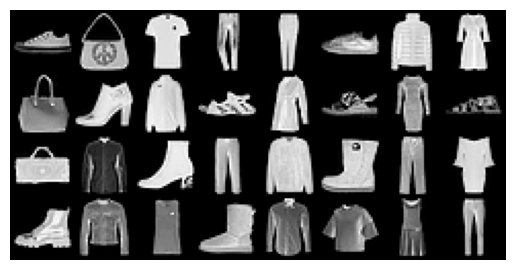

Sneaker    Bag        top        Trouser    Trouser    Sneaker    Coat       Dress     
Bag        Ankle boot Coat       Sandal     Coat       Sandal     Dress      Sandal    
Bag        Shirt      Ankle boot Trouser    Pullover   Ankle boot Trouser    Dress     
Ankle boot Coat       top        Ankle boot Shirt      Pullover   Dress      Trouser   


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

def grid_show(images, nrow=8):
    imshow(torchvision.utils.make_grid(images, nrow=nrow))


def print_grid(labels, nrow=8):
    rows = [labels[n : n + nrow] for n in range(0, len(labels), nrow)]
    for r in rows:
        print(" ".join(f"{classes[c]:10s}" for c in r))

grid_show(images)
print_grid(labels)

## LeNet

LeNet to bardzo znany, klasyczny model sieci konwolucyjnej.

Warstwy:
- obraz
- konwolucja, kernel $5 \times 5$, bez paddingu, 6 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- konwolucja, kernel $5 \times 5$, bez paddingu, 16 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- warstwa w pełni połączona, 120 neuronów na wyjściu
- warstwa w pełni połączona, 84 neurony na wyjściu
- warstwa w pełni połączona, na wyjściu tyle neuronów, ile jest klas

### Zadanie 1 (2 punkty)


Zaimplementuj wyżej opisaną sieć, używając biblioteki PyTorch. Wprowadzimy sobie jednak pewne modyfikacje, żeby było ciekawiej:
- w pierwszej warstwie konwolucyjnej użyj 20 kanałów (feature maps)
- w drugiej warstwie konwolucyjnej użyj 50 kanałów (feature maps)
- w pierwszej warstwie gęstej użyj 300 neuronów
- w drugiej warstwie gęstej użyj 100 neuronów

Przydatne elementy z pakietu `torch.nn`:
* `Conv2d()`
* `AvgPool2d()`
* `Linear()`

Z pakietu `torch.nn.functional`:
* `relu()`

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5)

        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5)

        self.fc1 = nn.Linear(50 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x


# your_code
model = LeNet()
model

lenet = LeNet()
param_num = sum(p.numel() for p in lenet.parameters())
param_num


132704

In [ ]:
lenet = LeNet()
param_num = sum(p.numel() for p in lenet.parameters())

assert param_num == 132704
print("Solution is correct!")

Solution is correct!


Do treningu użyjemy stochastycznego spadku po gradiencie (SGD), a jako funkcję straty Categorical Cross Entropy. W PyTorch-u funkcja ta operuje na indeksach klas (int), a nie na wektorach typu one-hot (jak w Tensorflow).

In [ ]:
import torch.optim as optim

net = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Zadanie 2 (1 punkt)

Uzupełnij pętlę uczącą sieć na podstawie jej predykcji. Oblicz (wykonaj krok do przodu) funkcję straty, a następnie przeprowadź propagację wsteczną i wykonaj krok optymalizatora.

In [1]:
net.train()

for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print(f"[{epoch+1}, {i+1}] loss: {running_loss/100:.3f}")
      running_loss = 0.0



NameError: name 'net' is not defined

Zobaczmy na kilku przykładach jak działa wytrenowana sieć.

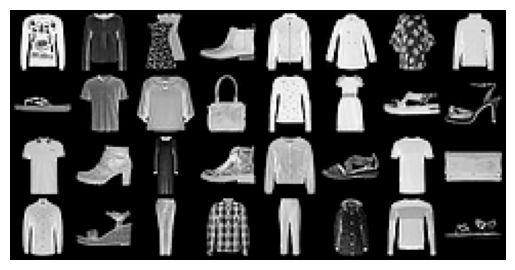

Ground Truth
Pullover   Shirt      Dress      Ankle boot Coat       Coat       Dress      Coat      
Sandal     top        Shirt      Bag        Pullover   Dress      Sandal     Sandal    
top        Ankle boot Dress      Ankle boot Coat       Sandal     top        Bag       
Shirt      Sandal     Trouser    Shirt      Trouser    Coat       Pullover   Sandal    

Predicted
Pullover   Pullover   Trouser    Ankle boot Coat       Coat       Shirt      Coat      
Sandal     top        Pullover   Bag        Pullover   Dress      Sandal     Sandal    
top        Ankle boot Dress      Ankle boot Pullover   Sandal     top        Bag       
Shirt      Sandal     Trouser    Pullover   Trouser    Shirt      Pullover   Sandal    


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

grid_show(images)
print("Ground Truth")
print_grid(labels)

outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print()
print("Predicted")
print_grid(predicted)

Obliczmy dokładności (accuracy) dla zbioru danych.

In [ ]:
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 80 %


Skomentuj wyniki:

*   Uzyskaliśmy dokładność rzędu 80%. Jest to solidny, ale nie idealny wynik. Wynika to z ograniczeń architektury, gdyż LeNet jest dość płytką siecią. Nie zastosowano także technik poprawiających generalizację. Podsumowując, LeNet sprawdza się jako klasyczna i szybka sieć CNN.

Znając ogólny wynik klasyfikacji dla zbioru przeanalizujmy dokładniej, z którymi klasami jest największy problem.

### Zadanie 3 (1 punkt)

Oblicz dokładność działania sieci (accuracy) dla każdej klasy z osobna. Podczas oceniania skuteczności modelu nie potrzebujemy, aby gradienty się liczyły. Możemy zatem zawrzeć obliczenia w bloku `with torch.no_grad():`

In [ ]:
net.eval()

correct = [0 for _ in range(10)]
total = [0 for _ in range(10)]

with torch.no_grad():
  for images, labels in testloader:

    images = images.to(device)
    labels = labels.to(device)

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    for label, prediction in zip(labels, predicted):
      total[label] += 1
      if label == prediction:
        correct[label] += 1

for i, classname in enumerate(classes):
  accuracy = 100 * correct[i] / total[i]
  print(f"Accuracy for class: {classname:10s} is {accuracy:5.1f} %")

# print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

# your_code


Accuracy for class: top        is  86.1 %
Accuracy for class: Trouser    is  93.4 %
Accuracy for class: Pullover   is  78.2 %
Accuracy for class: Dress      is  85.0 %
Accuracy for class: Coat       is  66.1 %
Accuracy for class: Sandal     is  94.9 %
Accuracy for class: Shirt      is  28.3 %
Accuracy for class: Sneaker    is  93.4 %
Accuracy for class: Bag        is  92.7 %
Accuracy for class: Ankle boot is  88.1 %


Skomentuj wyniki:

*   Najwyższą dokładność osiągają obiekty o prostych, wyraźnych kształtach, które dobrze odróżniają się od pozostałych obiektów. Top, dress, coat, shirt mają mniejszą dokładność, gdyż mają podobne do siebie kontury, co zwiększa prawdopodobieństwo pomyłek.

## Detekcja obiektów

Problem detekcji polega na nie tylko sklasyfikowaniu obiektów na obrazie, ale również wyznaczeniu jego dokładnego położenia w postaci bounding-box-u.
Choć jest to problem odmienny od klasyfikacji obrazów, to w praktyce ściśle z nim powiązany - modele do detekcji obiektów przeważnie do pewnego momentu wyglądają tak samo, jak modele klasyfikacji. Jednak pod koniec sieć jest dzielona na 2 wyjścia: jedno to standardowa klasyfikacja, a drugie to regresor określający pozycję obiektu na obrazie, tzw. bounding box. Najpopularniejszymi przykładami takich sieci są YOLO i Mask R-CNN. Zbiór danych też jest odpowiednio przygotowany do tego zadania i oprócz właściwych zdjęć zawiera również listę bounding-box-ów i ich etykiety.

Zobaczymy jak działa detekcja na przykładzie już wytrenowanej sieci neuronowej. Autorzy skutecznych sieci często udostępniają ich wagi online, dzięki czemu jeżeli mamy doczynienia z analogicznym problemem jak ten, do którego dana sieć była przygotowana możemy z niej skorzystać "prosto z pudełka".

PyTorch pozwala nam na pobranie wytrenowanych wag dla kilku najpopularniejszych modeli. Sprawdzimy jak z tego skorzystać.

In [ ]:
from torchvision.models import detection
import numpy as np
import cv2
from PIL import Image
import urllib

Poniżej znajduje się funkcja pozwalająca wczytać obraz z sieci. Przyda się do testowania działania sieci.

In [ ]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

Model, którym się zajmiemy to Faster R-CNN, który był trenowany na zbiorze COCO. Poniżej znajduje się lista klas (etykiet) dla tego zbioru danych.

In [ ]:
classes = [
    "__background__",
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "street sign",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "hat",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "shoe",
    "eye glasses",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "plate",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "mirror",
    "dining table",
    "window",
    "desk",
    "toilet",
    "door",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "blender",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

colors = np.random.randint(0, 256, size=(len(classes), 3))

Inizjalizacja modelu ResNet50-FPN wytrenowanymi wagami. Inicjalizujemy zarówno sieć backbone jak i RCNN.

In [ ]:
model = detection.fasterrcnn_resnet50_fpn(
    weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT,
    weights_backbone=torchvision.models.ResNet50_Weights.DEFAULT,
    progress=True,
    num_classes=len(classes)
).to(device)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:00<00:00, 176MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

IPython, z którego korzystamy w Jupyter Notebooku, ma wbudowaną funkcję `display()` do wyświetlania obrazów.

Do pobierania obrazów możemy się posłyżyć wget-em.

In [ ]:
# Pobieranie obrazka z sieci
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg --output-document toothbrushes.jpg

--2025-12-10 21:29:20--  https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224733 (219K) [image/jpeg]
Saving to: ‘toothbrushes.jpg’

toothbrushes.jpg    100%[===================>] 219.47K  --.-KB/s    in 0.04s   

2025-12-10 21:29:20 (4.90 MB/s) - ‘toothbrushes.jpg’ saved [224733/224733]



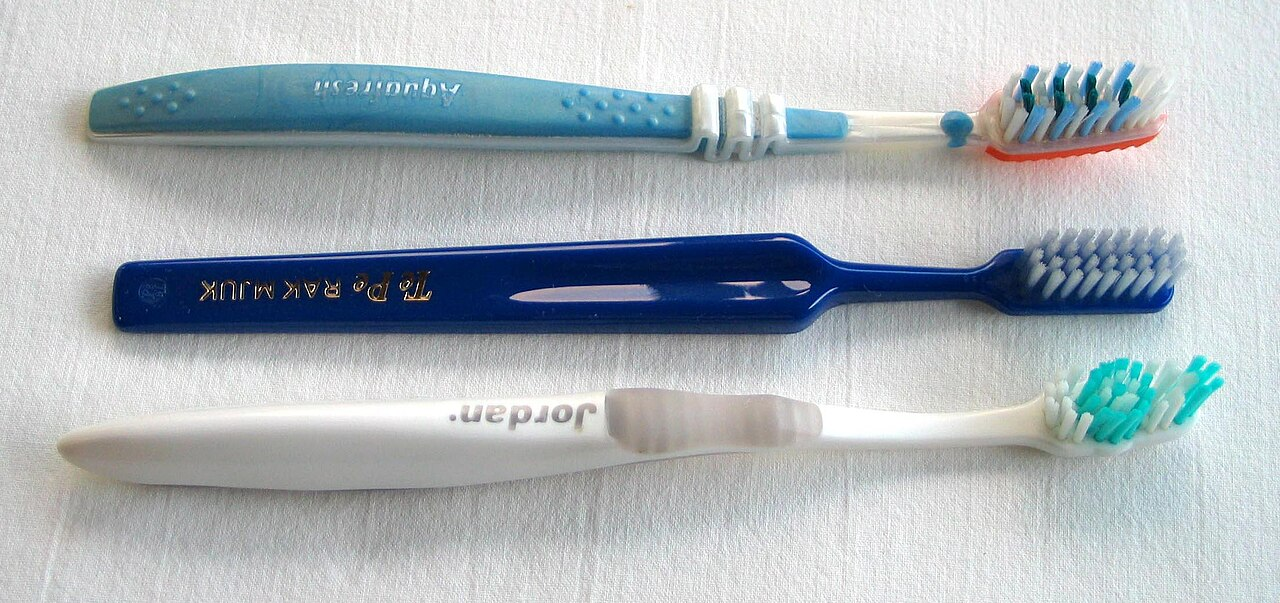

In [ ]:
# Wyświetlanie obrazka
image = Image.open("toothbrushes.jpg")
# make sure we have 3-channel RGB, e.g. without transparency
image = image.convert("RGB")
display(image)

PyTorch wymaga obrazów w kształcie [channels, height, width] (C, H, W) oraz z wartościami pikseli między 0 a 1. Pillow wczytuje obrazy z kanałami (H, W, C) oraz z wartościami pikseli między 0 a 255. Przed wykorzystaniem sieci neuronowej trzeba zatem:
- zamienić obraz na tensor
- zmienić kolejność kanałów
- podzielić wartości pikseli przez 255

In [ ]:
image_tensor = torch.from_numpy(np.array(image))
image_tensor = image_tensor.permute(2, 0, 1)
image_tensor_int = image_tensor  # useful for displaying, dtype = uint8
image_tensor = image_tensor / 255
image_tensor.shape, image_tensor.dtype

(torch.Size([3, 603, 1280]), torch.float32)

### Zadanie 4 (1 punkt)

Użyj modelu do wykrycia obiektów na obrazie. Następnie wybierz tylko te bounding boxy, dla których mamy wynik powyżej 50%. Wypisz te bounding boxy, ich prawdopodobieństwa (w procentach) oraz nazwy klas.

Następnie wykorzystaj wyniki do zaznaczenia bounding box'a dla każdego wykrytego obiektu na obrazie oraz podpisz wykrytą klasę wraz z prawdopodobieństwem. Możesz tutaj użyć:
- [OpenCV](https://stackoverflow.com/questions/56108183/python-opencv-cv2-drawing-rectangle-with-text)
- [PyTorch - Torchvision](https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#visualizing-bounding-boxes)

Detected objects (score >= 50%):

Class: toothbrush      | Score:  98.53% | Box: [ 457.84833  358.64264 1234.799    483.15   ]
Class: toothbrush      | Score:  97.03% | Box: [ 281.6166     57.776344 1203.0059    168.4874  ]
Class: toothbrush      | Score:  72.57% | Box: [ 504.152    234.61879 1189.8981   327.2141 ]
Class: toothbrush      | Score:  70.49% | Box: [  34.23686  348.2478  1270.7509   509.33777]
Class: book            | Score:  66.32% | Box: [111.36575 236.38312 860.2602  343.70386]


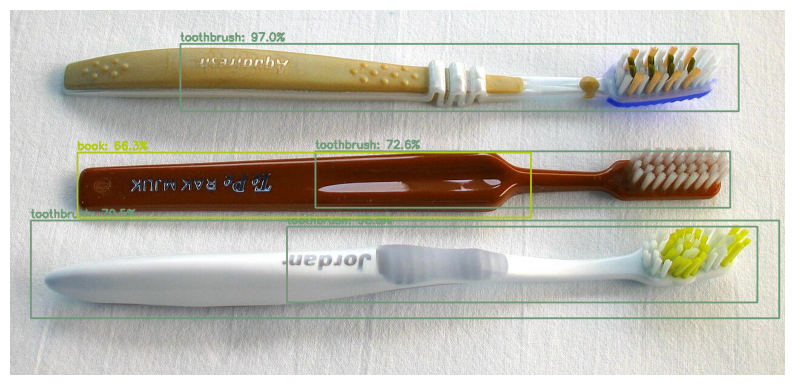

In [ ]:
# your_code

img = image_tensor.unsqueeze(0).to(device)

with torch.no_grad():
  outputs = model(img)[0]

boxes = outputs["boxes"].cpu().numpy()
labels = outputs["labels"].cpu().numpy()
scores = outputs["scores"].cpu().numpy()

threshold = 0.5
keep = scores > threshold

boxes = boxes[keep]
labels = labels[keep]
scores = scores[keep]

print("Detected objects (score >= 50%):\n")
for b, s, l in zip(boxes, scores, labels):
  print(f"Class: {classes[l]:15s} | Score: {s*100:6.2f}% | Box: {b}")

image_draw = image_tensor_int.permute(1, 2, 0).cpu().numpy().copy()

for box, score, label in zip(boxes, scores, labels):
  color = colors[label].tolist()
  x1, y1, x2, y2 = box.astype(int)

  cv2.rectangle(image_draw, (x1, y1), (x2, y2), color, 2)

  text = f"{classes[label]}: {score*100:.1f}%"
  cv2.putText(
      image_draw, text, (x1, y1 - 5),
      cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2
  )

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Fine-tuning i pretrening

Trenowanie głębokich sieci neuronowych do przetwarzania obrazów jest zadaniem wymagającym bardzo dużych zbiorów danych i zasobów obliczeniowych. Często jednak, nie musimy trenować takich sieci od nowa, możemy wykorzystać wytrenowane modele i jedynie dostosowywaać je do naszych problemów. Działanie takie nazywa się transfer learning-iem.

Przykładowao: mamy już wytrenowaną sieć na dużym zbiorze danych (pretrening) i chcemy, żeby sieć poradziła sobie z nową klasą obiektów (klasyfikacja), albo lepiej radziła sobie z wybranymi obiektami, które już zna (fine-tuning). Możemy usunąć ostatnią warstwę sieci i na jej miejsce wstawić nową, identyczną, jednak z losowo zainicjalizowanymi wagami, a następnie dotrenować sieć na naszym nowym, bardziej specyficznym zbiorze danych. Przykładowo, jako bazę weźmiemy model wytrenowany na zbiorze ImageNet i będziemy chcieli użyć go do rozpoznawania nowych, nieznanych mu klas, np. ras psów.

Dla przećwiczenia takiego schematu działania wykorzystamy zbiór danych z hotdogami. Będziemy chcieli stwierdzić, czy na obrazku jest hotdog, czy nie. Jako sieci użyjemy modelu ResNet-18, pretrenowanej na zbiorze ImageNet.

In [ ]:
# Download the hotdog dataset
!wget http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
!unzip -n hotdog.zip

--2025-12-10 21:32:58--  http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
Resolving d2l-data.s3-accelerate.amazonaws.com (d2l-data.s3-accelerate.amazonaws.com)... 13.224.28.83
Connecting to d2l-data.s3-accelerate.amazonaws.com (d2l-data.s3-accelerate.amazonaws.com)|13.224.28.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261292301 (249M) [application/zip]
Saving to: ‘hotdog.zip’

hotdog.zip          100%[===================>] 249.19M  65.0MB/s    in 4.2s    

2025-12-10 21:33:03 (58.7 MB/s) - ‘hotdog.zip’ saved [261292301/261292301]

Archive:  hotdog.zip
   creating: hotdog/
   creating: hotdog/train/
   creating: hotdog/train/not-hotdog/
 extracting: hotdog/train/not-hotdog/50.png  
 extracting: hotdog/train/not-hotdog/554.png  
 extracting: hotdog/train/not-hotdog/299.png  
  inflating: hotdog/train/not-hotdog/428.png  
  inflating: hotdog/train/not-hotdog/475.png  
  inflating: hotdog/train/not-hotdog/933.png  
 extracting: hotdog/train/not-hotdog/

Kiedy korzystamy z sieci pretrenowanej na zbiorze ImageNet, zgodnie [z dokumentacją](https://pytorch.org/vision/0.8/models.html) trzeba dokonać standaryzacji naszych obrazów, odejmując średnią i dzieląc przez odchylenie standardowe każdego kanału ze zbioru ImageNet.

```
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are
expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229,
0.224, 0.225]. You can use the following transform to normalize:

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

```

In [ ]:
torch.manual_seed(17)

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

train_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

In [ ]:
pretrained_net = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 161MB/s]


In [ ]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

### Zadanie 5 (1 punkt)

Zastąp wyjściową warstwę liniową naszej fine-fune'owanej sieci nową warstwą o odpowiedniej liczbie wyjść i zainicjuj ją losowymi wartościami.

In [ ]:
finetuned_net = torchvision.models.resnet18(
    weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

in_features = finetuned_net.fc.in_features

finetuned_net.fc = nn.Linear(in_features, 2)

finetuned_net = finetuned_net.to(device)

finetuned_net
# your_code


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
assert finetuned_net.fc.out_features == 2
print("Solution is correct!")

Solution is correct!


Poniżej znajduje się pętla ucząca, która dotrenuje nasz detektor hot-dog-ów.

In [ ]:
import time
import copy


def train_model(
    model, dataloaders, criterion, optimizer, num_epochs=25
):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(1, num_epochs + 1):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == "train"):
                    # Get model outputs and calculate loss

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == "val":
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

Fine-tuning...

In [ ]:
import os

data_dir = "hotdog"
batch_size = 32

model_ft = finetuned_net.to(device)
train_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "train"), transform=train_augs
    ),
    batch_size=batch_size,
    shuffle=True,
)
test_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "test"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)
loss = nn.CrossEntropyLoss(reduction="none")

### Zadanie 6 (1 punkt)

Zmodyfikuj tak parametry sieci, aby learning rate dla ostatniej warstwy był 10 razy wyższy niż dla pozostałych.

Trzeba odpowiednio podać pierwszy parametr `torch.optim.SGD` tak, aby zawierał parametry normalne, oraz te z `lr * 10`. Paramety warstw niższych to takie, które mają nazwę inną niż `fc.weight` albo `fc.bias` - może się przydać metoda sieci `named_parameters()`.


In [ ]:
def train_fine_tuning(net, learning_rate, num_epochs=15):

    params_to_update = []
    params_fc = []

    for name, param in net.named_parameters():
        if "fc.weight" in name or "fc.bias" in name:
            params_fc.append(param)
        else:
            params_to_update.append(param)

    trainer = torch.optim.SGD(
        [
            {"params": params_to_update, "lr": learning_rate},
            {"params": params_fc, "lr": learning_rate * 10},
        ],
        momentum=0.9
    )

    dataloaders_dict = {"train": train_iter, "val": test_iter}
    criterion = nn.CrossEntropyLoss()

    model_ft, hist = train_model(
        net, dataloaders_dict, criterion, trainer, num_epochs=num_epochs
    )
    return model_ft, hist


# your_code


In [ ]:
model_ft, hist = train_fine_tuning(model_ft, learning_rate=5e-5)

Epoch 1/15
----------
train Loss: 0.5237 Acc: 0.7515
val Loss: 0.3198 Acc: 0.8963

Epoch 2/15
----------
train Loss: 0.3213 Acc: 0.8760
val Loss: 0.2457 Acc: 0.9162

Epoch 3/15
----------
train Loss: 0.2730 Acc: 0.8925
val Loss: 0.2164 Acc: 0.9200

Epoch 4/15
----------
train Loss: 0.2487 Acc: 0.9005
val Loss: 0.1977 Acc: 0.9237

Epoch 5/15
----------
train Loss: 0.2436 Acc: 0.9015
val Loss: 0.1842 Acc: 0.9212

Epoch 6/15
----------
train Loss: 0.2209 Acc: 0.9120
val Loss: 0.1753 Acc: 0.9287

Epoch 7/15
----------
train Loss: 0.2212 Acc: 0.9135
val Loss: 0.1639 Acc: 0.9400

Epoch 8/15
----------
train Loss: 0.2083 Acc: 0.9145
val Loss: 0.1534 Acc: 0.9450

Epoch 9/15
----------
train Loss: 0.1956 Acc: 0.9300
val Loss: 0.1513 Acc: 0.9412

Epoch 10/15
----------
train Loss: 0.1854 Acc: 0.9315
val Loss: 0.1432 Acc: 0.9475

Epoch 11/15
----------
train Loss: 0.1882 Acc: 0.9295
val Loss: 0.1392 Acc: 0.9462

Epoch 12/15
----------
train Loss: 0.1920 Acc: 0.9270
val Loss: 0.1373 Acc: 0.9450

E

skomentuj wyniki:

*   Model osiągnął bardzo dobre wyniki, a cały przebieg treningu wskazuje na to, że fine-tuning został przeprowadzony poprawnie i skutecznie. W kolejnych epokach obserwujemy stopniowy spadek val loss, stabilny wzrost val accuracy i brak oznak poważnego overfittingu. Model został skutecznie dostrojony i osiąga około 95% skuteczności.

Przy wyświetlaniu predykcji sieci musimy wykonać operacje odwrotne niż te, które wykonaliśmy, przygotowując obrazy do treningu:
- zamienić kolejność kanałów z (C, H, W) na (H, W, C)
- zamienić obraz z tensora na tablicę Numpy'a
- odwrócić normalizację (mnożymy przez odchylenie standardowe, dodajemy średnią) i upewnić się, że nie wychodzimy poza zakres [0, 1] (wystarczy proste przycięcie wartości)

In [ ]:
def imshow(img, title=None):
    img = img.permute(1, 2, 0).numpy()
    means = np.array([0.485, 0.456, 0.406])
    stds = np.array([0.229, 0.224, 0.225])
    img = stds * img + means
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    if title is not None:
        plt.title(title)

    plt.pause(0.001)

In [ ]:
import matplotlib.pyplot as plt
plt.ion()


def visualize_model(model, num_images=6):
    class_names = ["hotdog", "other"]
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_iter):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')

                imshow(inputs.data[j].cpu())

                if images_so_far == num_images:
                    return



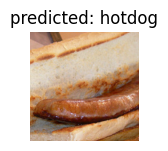

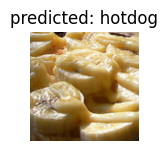

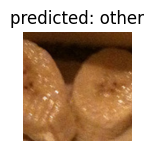

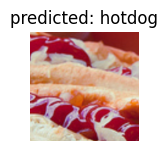

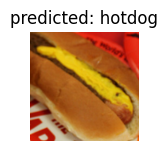

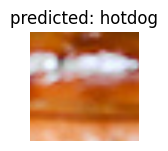

In [ ]:
visualize_model(model_ft)

## Zadanie dodatkowe (3 punkty)

W zadaniach dotyczących klasyfikacji obrazu wykorzystywaliśmy prosty zbiór danych i sieć LeNet. Teraz zamień zbiór danych na bardziej skomplikowany, przykładowo [klasyfikację gatunków ptaków](http://www.vision.caltech.edu/datasets/cub_200_2011/) lub [analizę zdjęć rentgenowskich płuc](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia). Zastosuj finetuning współczesnej, pretrenowanej sieci neuronowej, np. ResNet34 (lub głębszej), ConvNeXt, MobileNetV3.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize,
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

data_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray"

train_dataset = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, "train"), transform=train_transforms
)
val_dataset = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, "val"), transform=test_transforms
)
test_dataset = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, "test"), transform=test_transforms
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

dataloaders = {"train": train_loader, "val": val_loader}

from torchvision.models import resnet34, ResNet34_Weights

net = resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)

net.fc = nn.Linear(512, 2)

net = net.to(device)

learning_rate = 1e-4

params = [
    {"params": [p for n, p in net.named_parameters() if "fc" not in n], "lr": learning_rate},
    {"params": net.fc.parameters(), "lr": learning_rate * 10}
]

optimizer = optim.SGD(params, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 186MB/s]


In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-"*10)

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_corrects = 0
            running_loss = 0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    return model

net = train_model(net, dataloaders, criterion, optimizer, num_epochs=10)

net.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch 1/10
----------
train Loss: 0.3357 Acc: 0.8524
val Loss: 0.7987 Acc: 0.6875
Epoch 2/10
----------
train Loss: 0.2399 Acc: 0.8999
val Loss: 0.9982 Acc: 0.6250
Epoch 3/10
----------
train Loss: 0.2143 Acc: 0.9143
val Loss: 1.0343 Acc: 0.6250
Epoch 4/10
----------
train Loss: 0.1970 Acc: 0.9168
val Loss: 0.6939 Acc: 0.6875
Epoch 5/10
----------
train Loss: 0.1933 Acc: 0.9250
val Loss: 1.5362 Acc: 0.6250
Epoch 6/10
----------
train Loss: 0.1777 Acc: 0.9283
val Loss: 0.7540 Acc: 0.6875
Epoch 7/10
----------
train Loss: 0.1691 Acc: 0.9321
val Loss: 0.8179 Acc: 0.6875
Epoch 8/10
----------
train Loss: 0.1651 Acc: 0.9350
val Loss: 1.0185 Acc: 0.6250
Epoch 9/10
----------
train Loss: 0.1632 Acc: 0.9375
val Loss: 1.2055 Acc: 0.6250
Epoch 10/10
----------
train Loss: 0.1517 Acc: 0.9456
val Loss: 1.1231 Acc: 0.6250
Test Accuracy: 90.87%
